In [1]:
%reset
import shelve
# 데이터를 불러와서 green channel 의 peak 만 더 해본다
# Peak 를 우선 검출하자.
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np
import pandas as pd
import scipy
import peakutils
import cv2

import dlib
# 파일 네임 찾아주는 부분
from os import listdir
from os.path import isfile, join


In [2]:
# you have to adjust your local path (mypath) where you want to import a recording video onto python's working space.
# and you also have to change below filename (filename_clue).
mypath        = 'C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs'
filename_clue = 'outpy2018_05_18' #outpy2018_05_17_13_47_44.out

file_lists1  = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_lists2  = [mypath+'/'+f for f in file_lists1 if f[0:15] == filename_clue ]
file_lists3  = [f for f in file_lists2 if f[-1] == 't' ]

file_lists   = file_lists3
del(file_lists1, file_lists2, file_lists3)
print(len(file_lists))
# 데이터 불러오는 부분
filename = file_lists[1][0:len(file_lists[0])-4]; print(filename)

my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

del(filename, key, my_shelf)
print('done!')
% whos

2
C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/outpy2018_05_18_17_20_59.out
done!
Variable             Type                          Data/Info
------------------------------------------------------------
FF                   type                          <class 'plotly.tools.FigureFactory'>
cv2                  module                        <module 'cv2' from 'C:\\U<...>\cv2.cp36-win_amd64.pyd'>
dlib                 module                        <module 'dlib' from 'C:\\<...>dlib.cp36-win_amd64.pyd'>
download_plotlyjs    function                      <function download_plotly<...>js at 0x00000183BFA46510>
file_lists           list                          n=2
filename_clue        str                           outpy2018_05_18
go                   module                        <module 'plotly.graph_obj<...>graph_objs\\__init__.py'>
imgs                 list                          n=209
init_notebook_mode   function                      <function init_notebook_m<...>de at 0x0

In [3]:
hog_face_detector = dlib.get_frontal_face_detector()
mpx = 1; mg = 50; imgRect = [];
def imgRects(imgs):
    imgRect = []
    for i in range(len(imgs)):
        tmp    = np.array(imgs)[i]
        gray   = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
#         gray   = cv2.pyrDown( gray ); tmp = cv2.pyrDown( tmp );
        f_rect = hog_face_detector(gray, 0)
        for rect in f_rect:
            x, y = rect.left()*mpx-mg, rect.top()*mpx-mg
            w, h = (rect.right()*mpx - x + mg), (rect.bottom()*mpx - y + mg)
#             imgRect = tmp[y:y+h, x:x+w, :]
#             print( np.min(tmp[y:y+w, x:x+w].shape[0:2] ))
            awh = np.min( tmp[y:y+w, x:x+w].shape[0:2] )
#             print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
            imgRect.append(tmp[y:y+awh, x:x+awh, :]) # w, h 를 정사각형으로 만든다.
        if i % (len(imgs)//10) == 0:
            print('The percentage of iteration is ', (i*100)//len(imgs),' % done. --> w: ',w,' x h: ',h)
            print('tmp size is:',tmp.shape,'  -->  x,t,w,h:  ',[x,y,w,h],' --> ',tmp[y:y+w, x:x+w, :].shape, ' --> ', tmp[y:y+awh, x:x+awh, :].shape)
    return imgRect

imgRect = imgRects(imgs)
print(np.array(imgs).shape)
print(np.array(imgRect).shape)

import matplotlib.pyplot as plt
imgRect_tmp = cv2.cvtColor(np.array(imgRect)[1], cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(np.array(imgRect_tmp))
plt.show()
np.array(imgRect)[0].shape

The percentage of iteration is  0  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->  (249, 249, 3)  -->  (249, 249, 3)
The percentage of iteration is  9  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->  (249, 249, 3)  -->  (249, 249, 3)
The percentage of iteration is  19  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->  (249, 249, 3)  -->  (249, 249, 3)
The percentage of iteration is  28  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->  (249, 249, 3)  -->  (249, 249, 3)
The percentage of iteration is  38  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->  (249, 249, 3)  -->  (249, 249, 3)
The percentage of iteration is  47  % done. --> w:  249  x h:  250
tmp size is: (360, 640, 3)   -->  x,t,w,h:   [178, 111, 249, 250]  -->

<Figure size 640x480 with 1 Axes>

(249, 249, 3)

extracted image size is :  (249, 249, 3)
resizing image is :  (100, 100, 3)


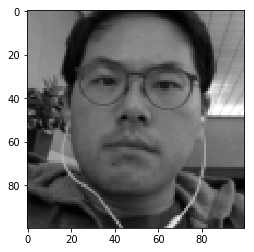

rectangles[[(17, 18) (80, 80)]]
The size of out_face is:  (100, 100, 3)


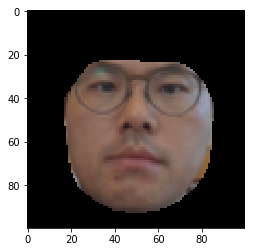

The masking iteration is done! A array size is :  (209, 100, 100, 3)
The second iteration is done! A unmasking array size is :  (209, 100, 100, 3)


In [5]:
from imutils import face_utils
import imutils
import numpy as np
import collections
import dlib
import cv2
from utils import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image
from imutils.face_utils import FaceAligner
import scipy.signal as ss

def face_remap(shape):
    remapped_image = cv2.convexHull(shape)
    return remapped_image

def face_alignment(image, gray, rects):
    for (i, rect) in enumerate(rects):
        faceAligned = aligner.align(image, gray, rect)
#         print(faceAligned.shape)
    return faceAligned
 
# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector  = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('C:/Users/ChungkiLee/Documents/GitHub/webcam/previewimgs/shape_predictor_68_face_landmarks.dat') # have to adjst your local path for "shape_predictor_68_face_landmarks.dat"
aligner   = FaceAligner(predictor, desiredFaceWidth = 100)
def face_masking(rects, faceAligned):
    out_face = np.zeros_like(faceAligned)
    for (i, rect) in enumerate(rects):    
        shape = predictor(faceAligned, rect)
        #initialize mask array
        remapped_shape = np.zeros_like(shape) 
        feature_mask = np.zeros((faceAligned.shape[0], faceAligned.shape[1]))   
        # we extract the face    
        shape = face_utils.shape_to_np(shape)
        remapped_shape = face_remap(shape)
        cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
        feature_mask = feature_mask.astype(np.bool)
        out_face[feature_mask] = faceAligned[feature_mask]
    return out_face    
    
# load the input image, resize it, and convert it to grayscale
image = np.array(imgRect)[45]
print('extracted image size is : ',image.shape)
image = imutils.resize(image, width=100)
print('resizing image is : ',image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(1)
plt.imshow(np.array(gray), cmap='gray')
plt.show()

# detect faces in the grayscale image
rects = detector(gray, 1) # 뒤에 붙는 상수는?
print(rects)

faceAligned = face_alignment(image, gray, rects)    
rects       = detector(faceAligned, 1) # 뒤에 붙는 상수는?
out_face    = face_masking(rects, faceAligned)

print('The size of out_face is: ',out_face.shape)
plt.figure(1)
# plt.axis("off")
plt.imshow(cv2.cvtColor(out_face, cv2.COLOR_BGR2RGB))
plt.show()    

# tmp = cv2.GaussianBlur(tmp,(5,5),0)

# print(np.array(imgRect).shape[0])
face_Resized_out   = [];
face_Aligned_out   = [];
face_masking_out   = [];
face_unmasking_out = [];
for i in range(np.array(imgRect).shape[0]):
    tmp         = np.array(imgRect)[i]
    tmp         = imutils.resize(tmp, width=100)
    tmp         = cv2.GaussianBlur(tmp,(5,5),0)
    gray        = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
    rects       = detector(gray, 1)    # 뒤에 붙는 상수는?
    faceAligned = face_alignment(tmp, gray, rects)    
    rects       = detector(faceAligned, 1)   # 뒤에 붙는 상수는?
    out_face    = face_masking(rects, faceAligned)
    
    face_Resized_out.append(tmp)
    
    bw2d = np.outer(ss.kaiser(100, 14), np.ones(100))
    bw2d = np.sqrt(bw2d * bw2d.T)
    bw2d = cv2.merge((bw2d,bw2d,bw2d))
    
    out_face  = out_face.astype('float64')
    tmp       = tmp.astype('float64')
    out_face *= bw2d
    tmp      *= bw2d
    
    face_Aligned_out.append(faceAligned)
    face_masking_out.append(out_face)
    face_unmasking_out.append(tmp)
    
print('The masking iteration is done! A array size is : ',np.array(face_masking_out).shape)
print('The second iteration is done! A unmasking array size is : ',np.array(face_unmasking_out).shape)

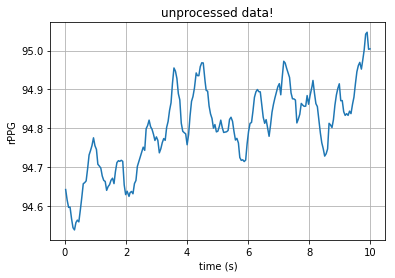

In [7]:
# masking과 normalization이 완료되었기 때문에, 이제 Heart signal을 추출해보자.

def heart_signal_extractor(face_masking_out):
    mG = np.zeros(len(face_masking_out));
    for i in range(len(face_masking_out)):
        tmp = np.array(face_masking_out)[i]
        mGt = np.mean(tmp[:, :, 1])
#         print(mGt)
        mG[i]=mGt
    return mG

mG   = heart_signal_extractor(face_masking_out)
mGun = heart_signal_extractor(face_unmasking_out)
mGag = heart_signal_extractor(face_Aligned_out)
mGrs = heart_signal_extractor(face_Resized_out)

plt.plot(time_x, mGrs)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('unprocessed data!')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

#아래 이미지를 보면 10초동안 측정가능한 심박동이 영상으로부터 잘 나타난다.

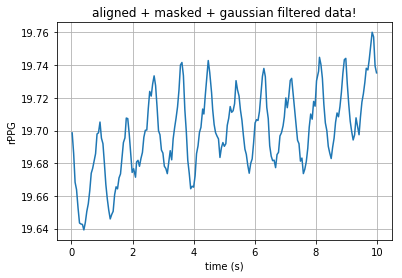

In [8]:
plt.plot(time_x, mGun)
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('aligned + masked + gaussian filtered data!')
plt.grid(True)
# plt.savefig("test.png")
plt.show()

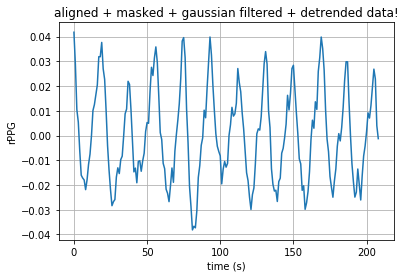

In [10]:
from seasonal import fit_seasons, adjust_seasons
import math

# detrend and deseasonalize
seasons, trend = fit_seasons(mGun)
adjusted = adjust_seasons(mGun, seasons=seasons)
residual = mGun - trend # residual is the target label of deep neural network.

# visualize results
# plt.figure()
# plt.plot(mGun, label='data')

# plt.figure()
# plt.plot(trend, label='trend')

plt.figure()
plt.plot(residual, label='residual')
plt.xlabel('time (s)')
plt.ylabel('rPPG')
plt.title('aligned + masked + gaussian filtered + detrended data!')
plt.grid(True)